<a href="https://colab.research.google.com/github/UmeshGayashan/EC7212-Take-Home-Assignment-1/blob/main/TakeHomeAssingment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


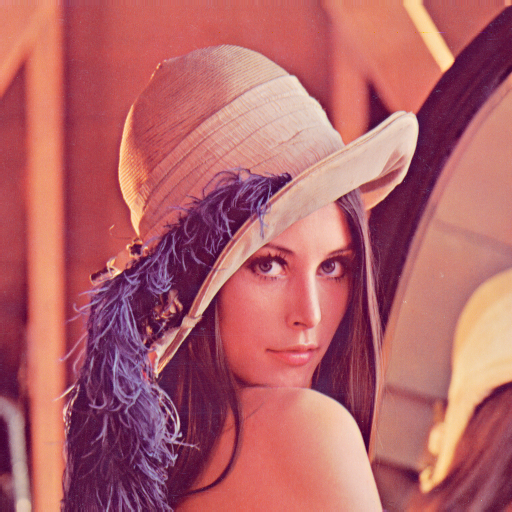

In [30]:
!pip install -qU gdown
!pip install easyocr

# Mount Google Drive directly
from google.colab import drive
drive.mount('/content/gdrive')

# Imports for displaying the image
import os
from PIL import Image
import IPython.display as display

image_path = '/content/gdrive/MyDrive/Take_Home_Assignment_1'

if os.path.exists(image_path):
    # Choose Images from directry
    image_files = [f for f in os.listdir(image_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
    if image_files:
        img_path = os.path.join(image_path, image_files[0])
        img = Image.open(img_path)
        display.display(img)
    else:
        print("No images found in the folder.")
else:
    print("Error: Folder not found. Check sharing permissions and folder name.")

 <h2>Reduce the number of intensity levels in a RGB image from 256 to 2^2(4)

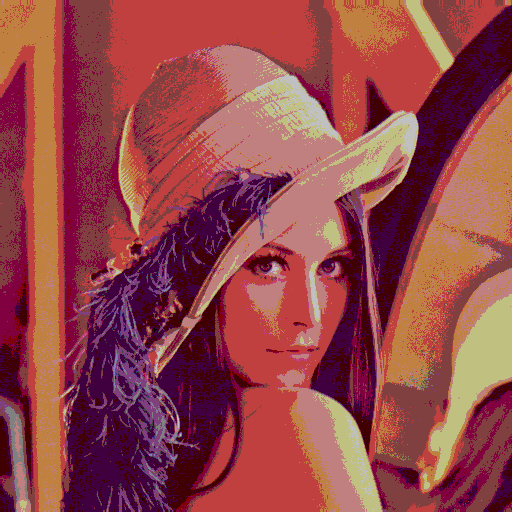

Image shown with 4 intensity levels per channel.


In [31]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def reduce_intensity_color(image_path, levels):
    img = cv2.imread(image_path)  # Load color image

    if img is None:
        print(f"Failed to load image: {image_path}")
        return

    factor = 256 // levels
    reduced_img = (img // factor) * factor


    cv2_imshow(reduced_img)
    print(f'Image shown with {levels} intensity levels per channel.')

# Applying specific level (2,4,8,16,32,64,128,256)
reduce_intensity_color(img_path, 4)

<h2>Reduce the number of intensity levels in a RGB image from 256 to 2^x (x = 1,2,3,4,5,6,7,8)

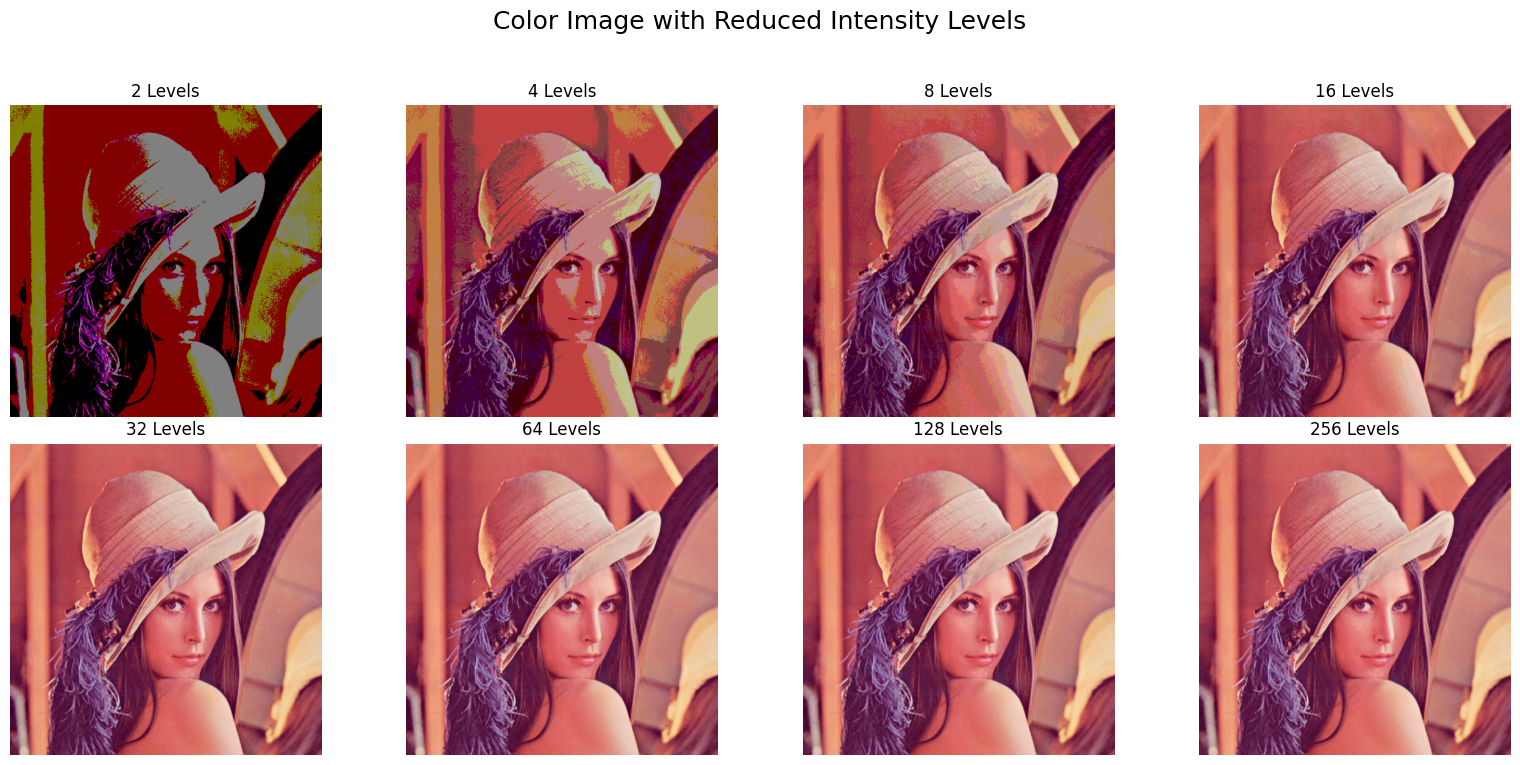

In [32]:
import matplotlib.pyplot as plt

def reduce_intensity_color_for_selected_levels(image_path, levels):
    img = cv2.imread(image_path)  # Load color image
    # OpenCV's cv2.imread() -> the image is read in the BGR   Matplotlib —> expect images in the RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

    if img is None:
        print(f"Failed to load image: {image_path}")
        return None, None

    factor = 256 // levels
    reduced_img = (img // factor) * factor
    return reduced_img

# List of levels to test (powers of 2)
valid_levels = [2 ** i for i in range(1, 9)]  # [2, 4, 8, 16, 32, 64, 128, 256]

# Prepare figure for 4x2 grid
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
fig.suptitle("Color Image with Reduced Intensity Levels", fontsize=18)

# Generate and display each image in grid
for idx, level in enumerate(valid_levels):
              # row     # column
    ax = axes[idx // 4][idx % 4]
    reduced_img = reduce_intensity_color_for_selected_levels(img_path, level)
    if reduced_img is not None:
        ax.imshow(reduced_img)
        ax.set_title(f'{level} Levels')
        ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()